In [1]:
#Veri manüpülasyon için kullanılır.
import pandas as pd                          

#Veri görselleştirmek için kullanılır.
import matplotlib.pyplot as plt                

#Kategorik değişkenlerin sayısal değişkenlerle ilişkisini görselleştirmeyi sağlar.
import seaborn as sns                           

#Çalışma sırasında oluşabilecek uyarı mesajlarını gizler, ekran çıktısını sade tutmayı sağlar.
import warnings
warnings.filterwarnings("ignore")

In [2]:
#CSV dosyası içe aktarılır.
df = pd.read_csv("student_depression_dataset.csv")       

#Veri setinin ilk beş satırı yazılır ve genel bakış sağlanır.
df.head()                                                                           

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [3]:
#Temel istatistik bilgilerini(sayısal değişkenlerin)verir.
#Daha okunabilir olması için de transpozesi alınır.
df.describe().T             

,count,mean,std,min,25%,50%,75%,max
id,27901.0,70442.149421,40641.175216,2.0,35039.00,70684.00,105818.00,140699.0
Age,27901.0,25.822300,4.905687,18.0,21.00,25.00,30.00,59.0
Academic Pressure,27901.0,3.141214,1.381465,0.0,2.00,3.00,4.00,5.0
Work Pressure,27901.0,0.000430,0.043992,0.0,0.00,0.00,0.00,5.0
CGPA,27901.0,7.656104,1.470707,0.0,6.29,7.77,8.92,10.0
Study Satisfaction,27901.0,2.943837,1.361148,0.0,2.00,3.00,4.00,5.0
Job Satisfaction,27901.0,0.000681,0.044394,0.0,0.00,0.00,0.00,4.0
Work/Study Hours,27901.0,7.156984,3.707642,0.0,4.00,8.00,10.00,12.0
Depression,27901.0,0.585499,0.492645,0.0,0.00,1.00,1.00,1.0


In [4]:
#Veri setinin yapısı hakkında bilgileri verir.
df.info()                      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [5]:
#Her sütun için eksik veri kontrolü yapılır.
df.isnull().sum()                                

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

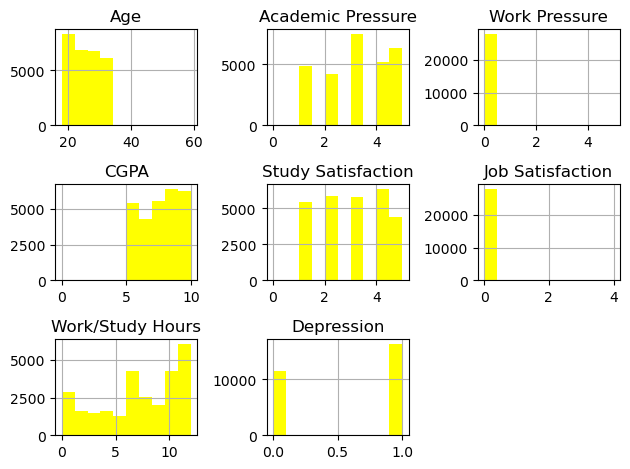

In [6]:
#id sütunun analiz için gerekli değil o yüzden silinir.
df.drop(columns = ["id"],inplace=True)  

#Sayısal değişkenlerin dağılımlarını ve istatistiklerinin görselleştirilmesi yapılır
plt.show()
df.hist(color="yellow")
plt.tight_layout()                            

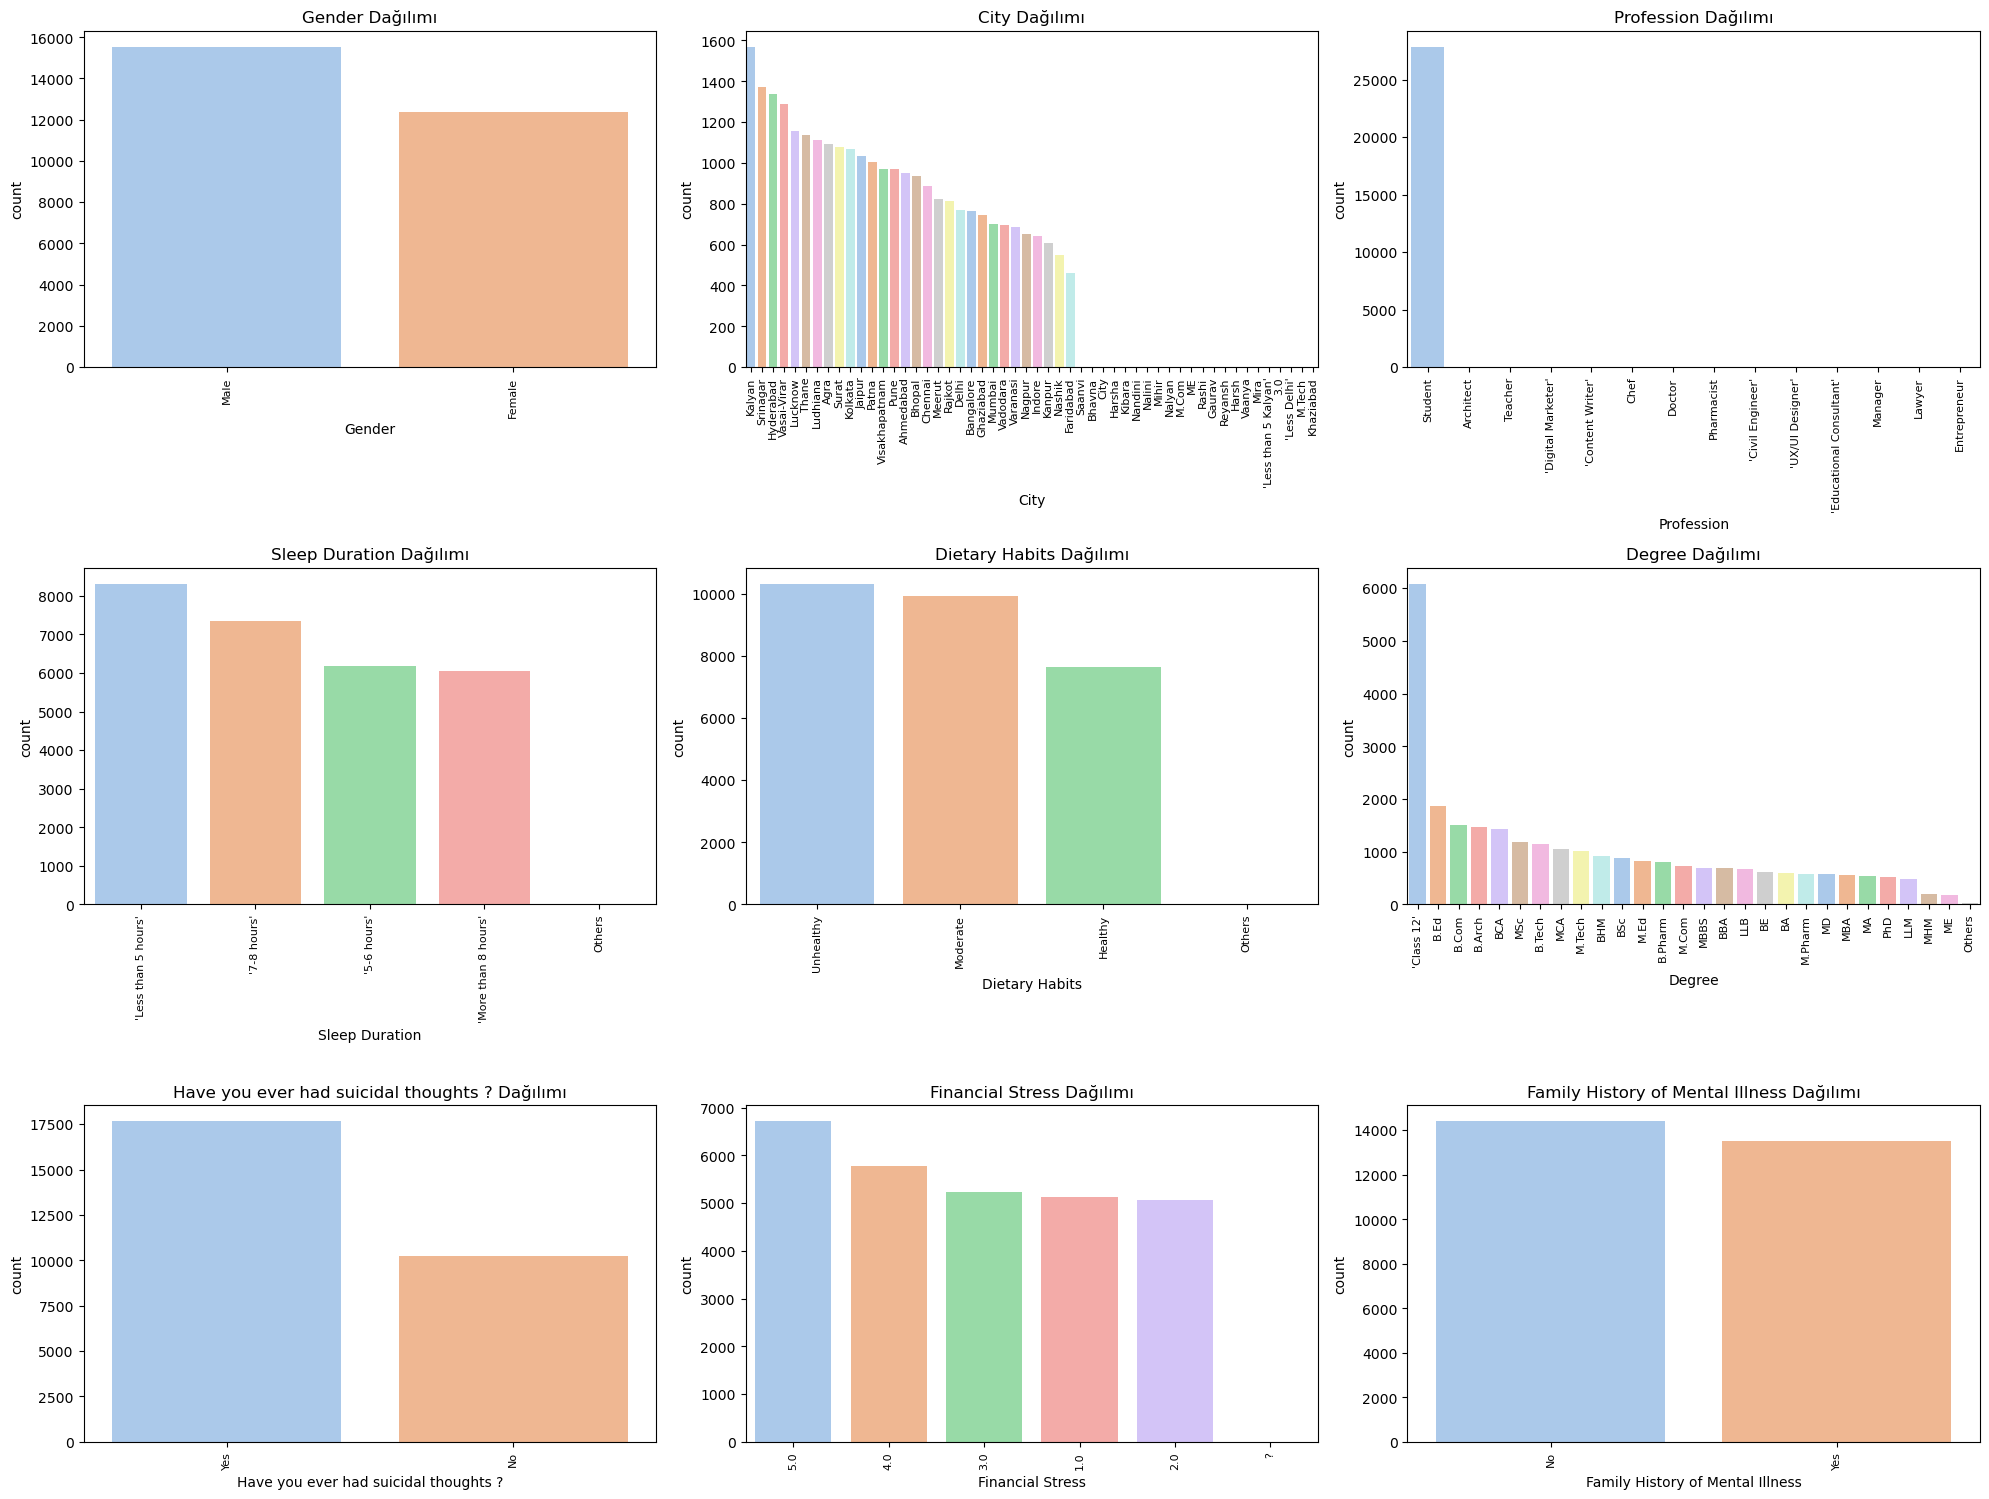

In [7]:
#Kategorik değişkenlerin görselleştirilmesi yapılır.
#Kolay kullanabilmek için tek bir değişkende liste şeklinde yazılır.
categorical_cols = ["Gender", "City", "Profession", "Sleep Duration", "Dietary Habits",
                    "Degree", "Have you ever had suicidal thoughts ?",
                    "Financial Stress", "Family History of Mental Illness"]

plt.figure(figsize=(20, 20))
#Kategorik sütunlar için her bir alt grafik (subplot) oluşturulur.
for i, col in enumerate(categorical_cols, 1):                              
    plt.subplot(4, 3, i)
    #Çubuk grafik oluşturulur.
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette="pastel")     
    plt.xticks(rotation=90,fontsize=8) #X ekseni etiketleri döndürülür.                                                     
    plt.title(f"{col} Dağılımı")
plt.tight_layout()
plt.show()



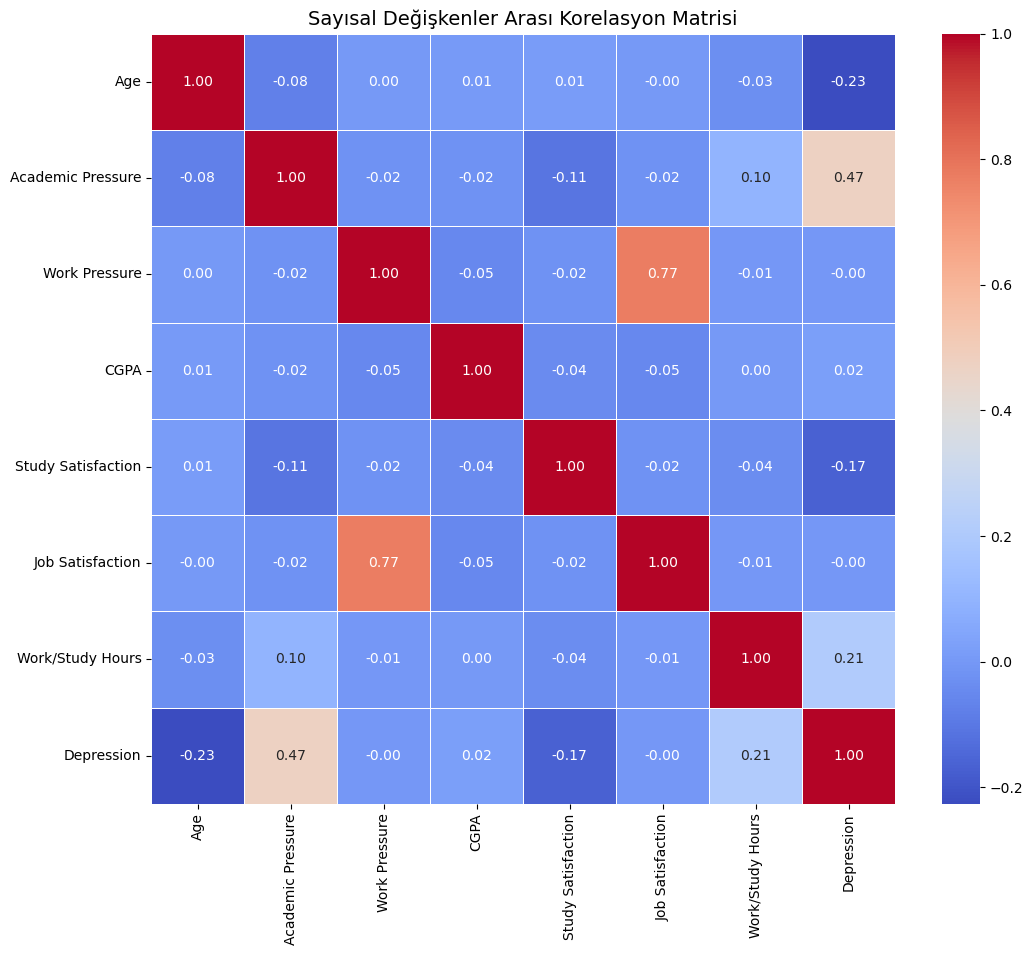

In [8]:
# Sadece sayısal değişkenler seçilir çünkü Korelasyon analizi,
#değişkenler arasındaki doğrusal ilişkiyi ölçtüğü için yalnızca sayısal 
#değişkenlerde anlamlı sonuçlar verir ve bu sonuç görselleştirilir.

numerical_df = df.select_dtypes(include=["int64", "float64"])

#Korelasyon matrisi hesaplanır. corr() ile.
correlation_matrix = numerical_df.corr()

# Korelasyon matris ısı haritası çizilir yani görselleştirilir.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Sayısal Değişkenler Arası Korelasyon Matrisi", fontsize=14)
plt.show()

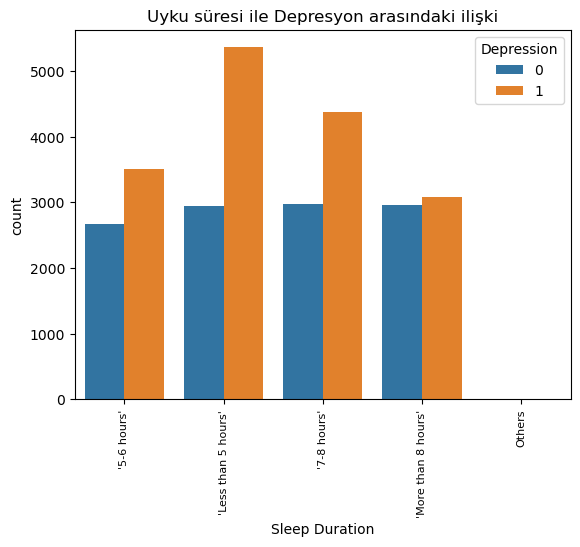

In [9]:
#Hedef değişken ile uyku süresi arasındaki ilişkinin görselleştirilmesidir.
sns.countplot(data=df , x='Sleep Duration' , hue= 'Depression')
plt.title("Uyku süresi ile Depresyon arasındaki ilişki")
plt.xticks(rotation=90,fontsize=8)  
plt.show()   

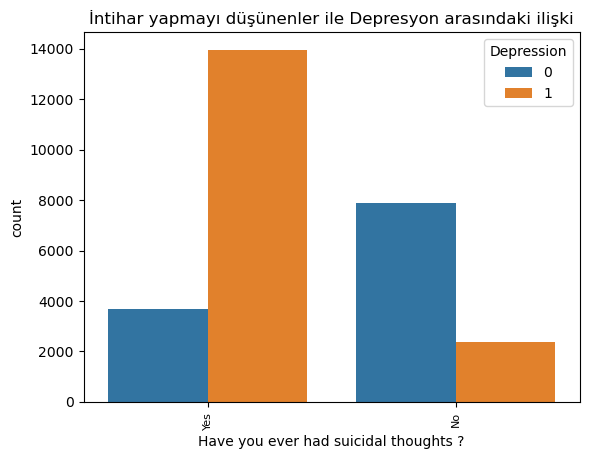

In [10]:
#Hedef değişken ile intihar etmeyi düşünenler arasındaki ilişkinin görselleştirilmesidir.
sns.countplot(data=df , x='Have you ever had suicidal thoughts ?' , hue= 'Depression')
plt.title("İntihar yapmayı düşünenler ile Depresyon arasındaki ilişki")
plt.xticks(rotation=90,fontsize=8)  
plt.show()

In [11]:
#Tüm kategorik değişkenler liste halinde toplanır.
categorical_cols = ["Gender", "City", "Profession", "Sleep Duration", "Dietary Habits",
                    "Degree", "Have you ever had suicidal thoughts ?",
                    "Financial Stress", "Family History of Mental Illness"]


#Kategorik verileri sayısal verilere dönüştürme işlemi yapılır. 
#(One-Hot Encoding get_dummies ile). 
#Verilere daha iyi StandardScaler uygulamak ve
#modelin daha doğru sonuçlar vermesi için uygulanır.
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [12]:
#Sayısal hale getirilen kategorik sütunları yazdırır.
df                           

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression,Gender_Male,City_'Less than 5 Kalyan',...,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Financial Stress_2.0,Financial Stress_3.0,Financial Stress_4.0,Financial Stress_5.0,Financial Stress_?,Family History of Mental Illness_Yes
0,33.0,5.0,0.0,8.97,2.0,0.0,3.0,1,True,False,...,False,False,False,True,False,False,False,False,False,False
1,24.0,2.0,0.0,5.90,5.0,0.0,3.0,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,31.0,3.0,0.0,7.03,5.0,0.0,9.0,0,True,False,...,False,False,False,False,False,False,False,False,False,True
3,28.0,3.0,0.0,5.59,2.0,0.0,4.0,1,False,False,...,False,False,False,True,False,False,False,True,False,True
4,25.0,4.0,0.0,8.13,3.0,0.0,1.0,0,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,27.0,5.0,0.0,5.75,5.0,0.0,7.0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
27897,27.0,2.0,0.0,9.40,3.0,0.0,0.0,0,True,False,...,True,False,False,False,False,True,False,False,False,True
27898,31.0,3.0,0.0,6.61,4.0,0.0,12.0,0,True,False,...,False,False,False,False,True,False,False,False,False,False
27899,18.0,5.0,0.0,6.88,2.0,0.0,10.0,1,False,False,...,False,False,False,True,False,False,False,True,False,False


In [13]:
#Tekrardan baktığımızda herhangi bir eksik değer yoktur.
df.isnull().sum()                     

Age                                     0
Academic Pressure                       0
Work Pressure                           0
CGPA                                    0
Study Satisfaction                      0
                                       ..
Financial Stress_3.0                    0
Financial Stress_4.0                    0
Financial Stress_5.0                    0
Financial Stress_?                      0
Family History of Mental Illness_Yes    0
Length: 114, dtype: int64

In [14]:
#Modelin daha iyi çalışması için sayısal
#değişkenler StandardScaler ile standartlaştırılır.
#(ortalama 0, standart sapma 1)
from sklearn.preprocessing import StandardScaler

#Sayısal türdeki değişkenler seçilir.
numerical_columns = df.select_dtypes(include=["float64","int64"]).columns 

#StandardScaler nesnesi oluşturulur.                                                   
scaler=StandardScaler()

#Gerekli parametreleri (ortalama ve standart sapma) öğrenir (fit)
#ardından veriyi bu parametrelere göre dönüştürür(transform)
df [numerical_columns] = scaler.fit_transform(df[numerical_columns])        

#Standartlaştırılmış verilerin her sütun için ilk beş satırı kontrol edilir.
print(df[numerical_columns].head())             


        Age  Academic Pressure  Work Pressure      CGPA  Study Satisfaction  \
0  1.463165           1.345543      -0.009777  0.893393           -0.693425   
1 -0.371474          -0.826104      -0.009777 -1.194076            1.510636   
2  1.055467          -0.102222      -0.009777 -0.425724            1.510636   
3  0.443921          -0.102222      -0.009777 -1.404862           -0.693425   
4 -0.167625           0.621660      -0.009777  0.322229            0.041262   

   Job Satisfaction  Work/Study Hours  Depression  
0          -0.01534         -1.121213    0.841395  
1          -0.01534         -1.121213   -1.188502  
2          -0.01534          0.497095   -1.188502  
3          -0.01534         -0.851495    0.841395  
4          -0.01534         -1.660650   -1.188502  


In [15]:
#Kullanılan model için bağımlı ve bağımsız değişkenler oluşturulur.

#Hedef değişkenimizdir yani bağımlı değişkendir.Modelin tahmin etmeye çalıştığı değerdir.
y=df["Depression"]  

#Onun dışındaki tüm değerler bağımsız değişkendir.Modelin tahmin yaparken kullandığı değerlerdir.
X = df.drop("Depression",axis=1)   

#Sütunundaki değerleri 0 veya 1 olarak dönüştürerek,hedef değişkeni hazırlar
#Örneğin eğer float ise 0.5 üzerindekileri 1 yap
y = (df["Depression"] > 0.5).astype(int)    

In [16]:
y.head() #Yukarıda sağlanan şartın çıktısıdır.

0    1
1    0
2    0
3    1
4    0
Name: Depression, dtype: int64

In [17]:
#Veri setini ayırmak için kullanılan kütüphanedir.
from sklearn.model_selection import train_test_split                                       

#Veri eğitim ve test olarak ikiye ayrılır.
X_train ,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)       

In [18]:
#Kullanılacak modelin kütüphanesi aktarılır.
from sklearn.neighbors import KNeighborsClassifier       

#5 komşu kullanılarak KNN modeli oluşturulur
knn=KNeighborsClassifier(n_neighbors=5)           

#X_train ve y_train eğitim için ayrılan bu değişkenler ile model eğitilir.
knn.fit(X_train,y_train)                                     

KNeighborsClassifier()

In [19]:
y_predict=knn.predict(X_test) #X_test verileri için tahmin yapılır.


#Modelinin performansını değerlendiren metrikleri içe aktarır.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve


Accuracy: 0.7966314280594875
Precision: 0.8038139266108061
Recall: 0.8591723285978999
F1 Score: 0.8305717271234512

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.71      0.75      2343
           1       0.80      0.86      0.83      3238

    accuracy                           0.80      5581
   macro avg       0.79      0.78      0.79      5581
weighted avg       0.80      0.80      0.79      5581



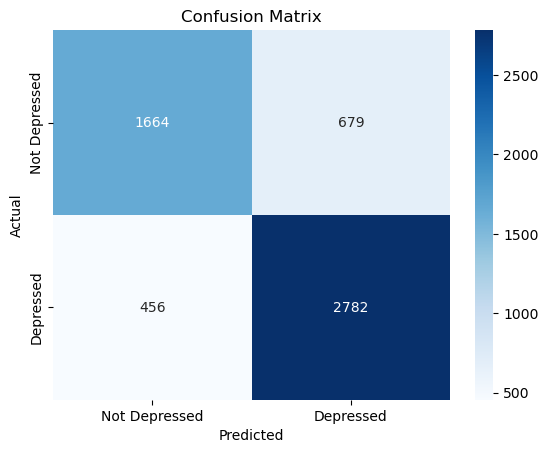

In [20]:
#Doğruluk (accuracy) skoru hesaplanır.
print("Accuracy:", accuracy_score(y_test, y_predict))


#Kesinlik (precision) skoru hesaplanır.
print("Precision:", precision_score(y_test, y_predict))


#Geri çağırma (recall) skoru hesaplanır.
print("Recall:", recall_score(y_test, y_predict))

#F1 skoru hesaplanır (kesinlik ve geri çağırmanın harmonik ortalaması).
print("F1 Score:", f1_score(y_test, y_predict))

#Sınıflandırma raporu (precision, recall, F1 ve destek değerlerini içerir).
#Yani tüm metriklerin bir arada sunulduğu detaylı rapordur.
print("\nClassification Report:\n", classification_report(y_test, y_predict))

#Bu değerler ile Confusion Matrix tablosu ve görselli oluşturulur.
#Gerçek ve tahmin edilen sınıfların karşılaştırılması)
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='Blues', xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [21]:
# KNN modeli %79.6 doğruluk ve 0.79 F1 skoru ile iyi performans göstermiştir.
# Özellikle depresyonlu bireyleri tanıma oranı yüksek 
#(recall = 0.86), ancak depresyonda olmayanlarda bazı yanlış pozitifler mevcuttur.


In [22]:
#Aşağıdaki  grafiklerde KNN algoritmasında en uygun K değerini belirlemek 
#için farklı k değerlerine göre
#precision, recall ve F1-score hesaplanmış 
#ve grafiklerle analiz edilmiştir.

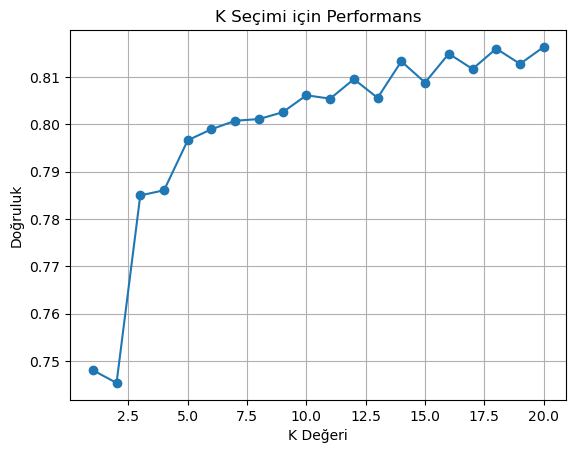

In [23]:
import matplotlib.pyplot as plt

#Farklı k değerleri için doğruluk (accuracy) değerlerini tutacak liste oluşturulur.
accuracy_list = []                  
for k in range(1, 21):
    #Her döngüde farklı k değeriyle yeni bir KNN modeli oluşturulur.
    knn = KNeighborsClassifier(n_neighbors=k)       
    knn.fit(X_train, y_train)
    #Test verisi üzerinden doğruluk skoru hesaplanır
    acc = knn.score(X_test, y_test)    
    #Hesaplanan doğruluk değeri listeye eklenir.
    accuracy_list.append(acc)                    

plt.plot(range(1, 21), accuracy_list, marker='o')
plt.xlabel("K Değeri")
plt.ylabel("Doğruluk")
plt.title("K Seçimi için Performans")
plt.grid(True)
plt.show()


In [ ]:
#K=17 civarında en yüksek doğruluk (~%80.7) elde edilmiştir.
# K değeri arttıkça doğruluk genellikle artmış,
#ancak çok büyük K'lerde performans sabitlenmektedir.


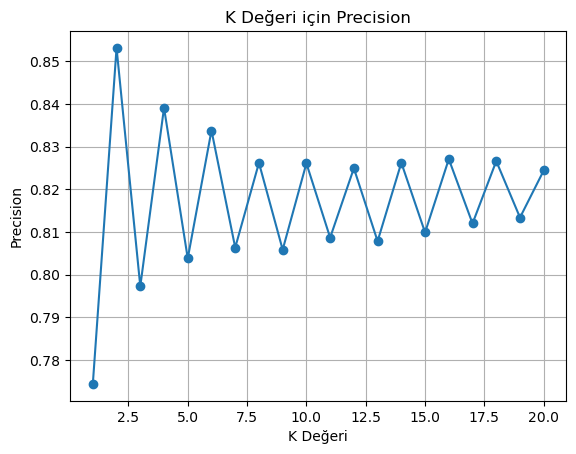

In [24]:
precision_list = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    pre = precision_score(y_test, y_predict, average='binary')   
    precision_list.append(pre)

plt.plot(range(1, 21), precision_list, marker='o')
plt.xlabel("K Değeri")
plt.ylabel("Precision")
plt.title("K Değeri için Precision")
plt.grid(True)
plt.show()


In [23]:
# K=2 civarında en yüksek precision (~%84.8) elde edilmiştir.
# K değeri arttıkça precision dalgalanmış,
#ancak belirli bir noktadan sonra stabil hale gelmiştir.

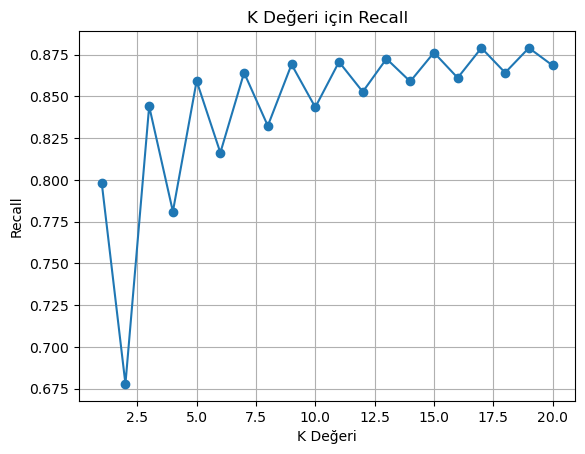

In [24]:
recall_list = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    rec = recall_score(y_test, y_predict, average='binary')
    recall_list.append(rec)

plt.plot(range(1, 21), recall_list, marker='o')
plt.xlabel("K Değeri")
plt.ylabel("Recall")
plt.title("K Değeri için Recall")
plt.grid(True)
plt.show()


In [25]:
# K=8 civarında en yüksek recall (~%87.5) elde edilmiştir.
# K değeri arttıkça recall değeri genel olarak yükselmiş
#ve sonrasında stabil hale gelmiştir.

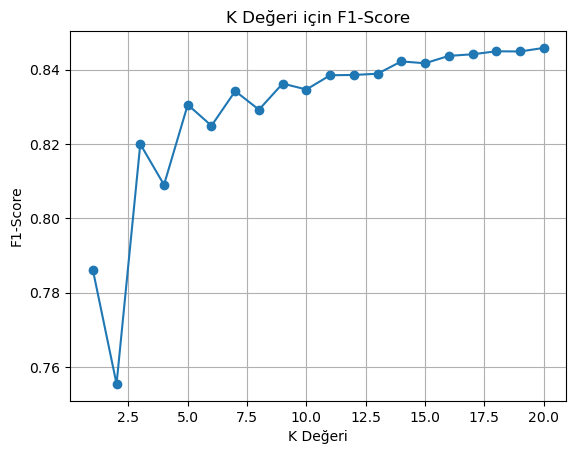

In [26]:
f1_list = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    f1 = f1_score(y_test, y_predict, average='binary')
    f1_list.append(f1)

plt.plot(range(1, 21), f1_list, marker='o')
plt.xlabel("K Değeri")
plt.ylabel("F1-Score")
plt.title("K Değeri için F1-Score")
plt.grid(True)
plt.show()


In [27]:
# K=8 sonrası F1-score değeri ~%84.4 seviyesinde sabitlenmiştir.
# K değeri arttıkça F1-score genel olarak yükselmiş
#ve sonrasında stabil hale gelmiştir.